# WalkID

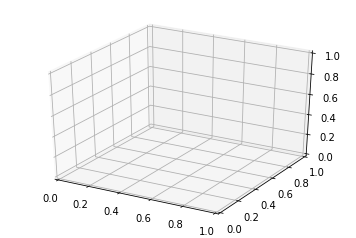

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy import stats


fig = plt.figure()
ax = fig.gca(projection='3d')

def read_datafile(file_name):
    data = np.loadtxt(file_name, delimiter=',', skiprows=10)
    return data
#loads files as 'data'

data = read_datafile('MPCR_acc_WalkID.csv')

In [2]:
 #points=7000

 #color1 = np.zeros((points,4))

 #for i in range(points):
 #	color1[i,:] = plt.cm.jet(255*i/points)


 #for i in range(points):
 #    ax.plot(data[i:i+2,1], data[i:i+2,2], data[i:i+2,3], color=color1[i])

 #plt.show()

In [3]:
data.shape

(22632, 4)

In [4]:
data[0:10,1:4]

array([[-0.026901,  0.125809, -0.996017],
       [-0.023972,  0.129227, -0.996033],
       [-0.026169,  0.12825 , -0.996765],
       [-0.025696,  0.123611, -0.997726],
       [-0.02739 ,  0.123627, -0.992371],
       [-0.025452,  0.121658, -0.995285],
       [-0.02301 ,  0.1241  , -0.995056],
       [-0.024704,  0.126053, -0.995789],
       [-0.028122,  0.126801, -0.995773],
       [-0.023239,  0.124359, -0.992615]])

Sample of raw accerometer data

In [5]:
def Line_Plot(y):
    x=range(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y)
#     fig.set_size_inches(18, 10)
    plt.show()
# plotting collected dataset

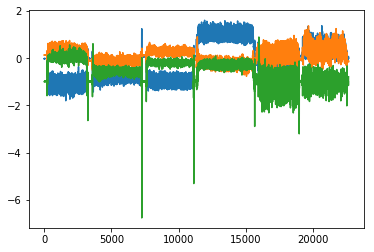

In [6]:
Line_Plot(data[0:23000,1:4])

A plot of the raw accelerometer data for the six subjects. The different colors represent the x, y, and z axis of motion.

In [7]:
c1=3350
c2=7418
c3=11233
c4=15700
c5=19112

These are the points in the data where each person finished walking. They will be used to seperate each subject into their own graph.

In [8]:
s1 = data[0:c1,1:4]
s2 = data[c1:c2,1:4]
s3 = data[c2:c3,1:4]
s4 = data[c3:c4,1:4]
s5 = data[c4:c5,1:4]
s6 = data[c5:,1:4]

This seperates the data into each individual subject.

In [9]:
s1=s1[500:-1-500]
s2=s2[500:-1-500]
s3=s3[500:-1-500]
s4=s4[500:-1-500]
s5=s5[500:-1-500]
s6=s6[500:-1-500]

This is cleaning up the transitions in the data so that the data being tested is as accurate as possible.

In [10]:
print(s1.shape)
print(s2.shape)
print(s3.shape)
print(s4.shape)
print(s5.shape)
print(s6.shape)

(2349, 3)
(3067, 3)
(2814, 3)
(3466, 3)
(2411, 3)
(2519, 3)


This shows that each person has a different amount of data points in the data. This will make it difficult to analyze.

In [11]:
s1=s1[0:2200]
s2=s2[0:2200]
s3=s3[0:2200]
s4=s4[0:2200]
s5=s5[0:2200]
s6=s6[0:2200]

This fixes the previous problem by making each subject have the same amount of data points. Each subject is limited to 2200 points.

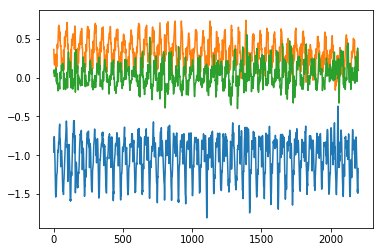

In [12]:
Line_Plot(s1)

Plot of Subject 1

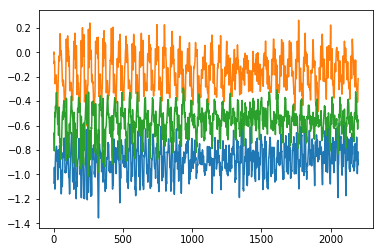

In [13]:
Line_Plot(s2)

Plot of Subject 2

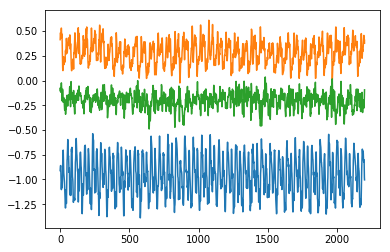

In [14]:
Line_Plot(s3)

Plot of Subject 3

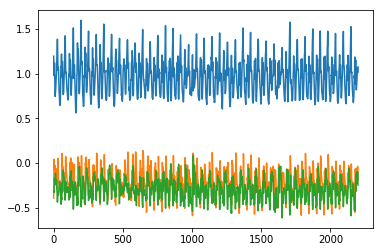

In [15]:
Line_Plot(s4)

Plot of Subject 4

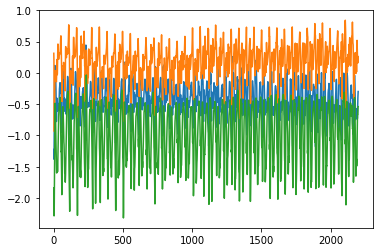

In [16]:
Line_Plot(s5)

Plot of Subject 5

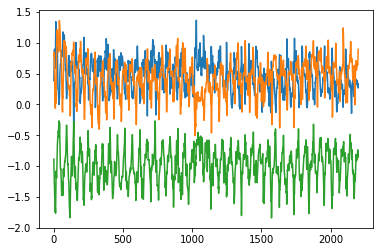

In [17]:
Line_Plot(s6)

Plot of Subject 6

In [18]:
s1_train=s1[0:1100]
s2_train=s2[0:1100]
s3_train=s3[0:1100]
s4_train=s4[0:1100]
s5_train=s5[0:1100]
s6_train=s6[0:1100]

In [19]:
s1_test=s1[1100:]
s2_test=s2[1100:]
s3_test=s3[1100:]
s4_test=s4[1100:]
s5_test=s5[1100:]
s6_test=s6[1100:]

This seperates the data between training and testing sets by cutting them in half

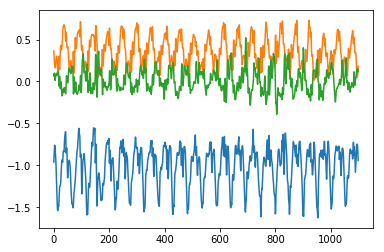

In [20]:
Line_Plot(s1_train)

Sample plot of training data. (Subject 1)

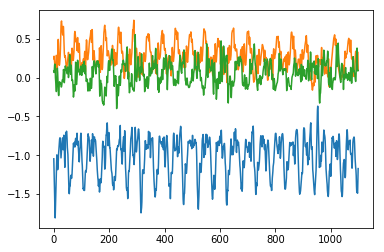

In [21]:
Line_Plot(s1_test)

Sample plot of testing data. (Subject 1)

In [22]:
X_Train=np.concatenate((s1_train,s2_train,s3_train,s4_train,s5_train,s6_train))

This combines all the training data into one set.

In [23]:
X_Train.shape

(6600, 3)

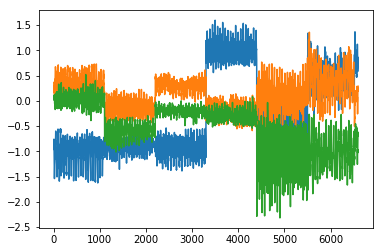

In [24]:
Line_Plot(X_Train)

Plot of the training data

In [25]:
X_Test=np.concatenate((s1_test,s2_test,s3_test,s4_test,s5_test,s6_test))

In [26]:
#X_Test=np.concatenate((s3_test,s6_test,s5_test,s4_test,s2_test,s1_test))

This combines all the testing data into one set.

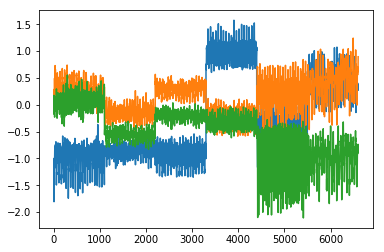

In [27]:
Line_Plot(X_Test)

Plot of the testing data

In [28]:
k=np.ones((1100,))

In [29]:
Y_Train = np.concatenate((0*k,1*k,2*k,3*k,4*k,5*k)).astype(int)
Y_Test = Y_Train.astype(int)

In [30]:
#Y_Train = np.concatenate((0*k,1*k,2*k,3*k,4*k,5*k)).astype(int)
#Y_Test = np.concatenate((2*k,5*k,4*k,3*k,1*k,0*k)).astype(int)

In [31]:
type(Y_Test)

numpy.ndarray

In [32]:
Y_Test

array([0, 0, 0, ..., 5, 5, 5])

In [33]:
Y_Test.shape

(6600,)

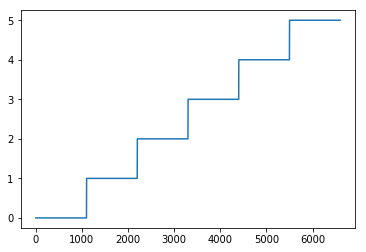

In [34]:
Line_Plot(Y_Test)

In [35]:
Y_Test=Y_Test[:,None]
Y_Train=Y_Train[:,None]

In [36]:
print(X_Test.shape)
print(X_Train.shape)
print(Y_Test.shape)
print(Y_Train.shape)

(6600, 3)
(6600, 3)
(6600, 1)
(6600, 1)


In [37]:
N = 8 # Size of N-gram time window
D = 10000 # Dimension of Hypervectors
Levels=100  # Number of levels for digitization
Threshold = 0.9
CH=4 # Amount of channels

In [38]:
def Create_Hypervector(D):
    randomIndex = np.random.permutation(D)
    randomHV = np.zeros((D,))
    randomHV[randomIndex[0 : int(D/2)]] = 1
    randomHV[randomIndex[int(D/2)+1 : D]] = -1
    return randomHV

The Create_Hypervector function creates a random hypervector with a size of 10,000. This hypervector is filled randomly with 1's and -1's

In [39]:
def Compute_Ngram(data, CiM, iM):

    Ngram = np.ones((1,iM.shape[1]))
    
    for time in range(data.shape[0]):
        
        record = np.zeros((1,iM.shape[1]))
        
        for channel in range(data.shape[1]):
            
            record += CiM[data[time,channel],:] * iM[channel,:]
            
        Ngram = np.roll(Ngram,1) * record
        
    return Ngram

The Compute_Ngram function takes in the data and rolls it into a format that can be used with hypervectors

In [40]:
def Cosine_Similarity(u, v):
  
    u = np.matrix(u)
    v = np.matrix(v)
    c = np.divide(np.matmul(u,np.transpose(v)),np.spacing(1)+np.sqrt(np.sum(np.multiply(u,u),axis=1))*np.sqrt(np.sum(np.multiply(v,v),axis=1)))
    
    return c

The Cosine_Similarity function tests the distance between every hypervector at once. It uses the formula 
cosΘ = (A * B)/(∣A∣ * ∣B∣) multiple times in order to accomplish this

In [41]:
def HDC_Train(Y, X, CiM, iM, N, Threshold):

    AM = np.zeros((np.max(Y)+1,iM.shape[1]))

    for i in range(X.shape[0]-(N+1)):

        Ngram = Compute_Ngram(X[i:i+N-1,:], CiM, iM)
      
        Angle = Cosine_Similarity(Ngram, AM[Y[i+N-1],:])
        
        if Angle < Threshold or np.isnan(Angle):

            AM[Y[i+N-1],:] += Ngram
        
    AM/=norm(AM,2)
        
    return AM

The HDC_Train function takes the Ngram and adds it to the associative memory. This becomes the hypervector that represents the person's walking pattern

In [42]:
def HDC_Predict (Y, X, AM, CiM, iM, N):

    Correct = 0
    Count = 0
    
    for i in range(len(Y)-(N+1)):

        Label = stats.mode(Y[i:i+N-1], axis=None)[0][0]
    
        Signal_HV = Compute_Ngram(X[i:i+N-1,:], CiM, iM)   
        
        Guess=np.argmax(Cosine_Similarity(AM, Signal_HV))
        
        if Guess == Label:
            Correct += 1
        
        Count += 1
        Accuracy = Correct / float(Count)
        
    return Accuracy

The HDC_Predict function takes in new data and tries to figure out who it belongs to. It uses the cosine similarity to make a guess and it returns its accuracy rate.

In [43]:
def Continuous_Item_Memory(D, MAXL):
    
    CiM = np.zeros((MAXL,D)) #create empty memory
    
    HV = Create_Hypervector(D)
    r = np.random.permutation(D)
    
    for i in range(MAXL):
        
        CiM[i,:] = HV
        #50 bits away from each until they become orthogonal
        SP = np.floor(D/2/MAXL)
        start = int((i*SP) + 1)
        end = int(((i+1)*SP) + 1)
        HV[r[start:end]] = HV[r[start:end]]*-1 #flips bits
        
    return (CiM)

In [44]:
def Item_Memory(D, CH):
    
    iM = np.zeros((CH,D)) #item memory orthogonal direction
    
    for row in range(CH):
        
        iM[row,:] = Create_Hypervector(D)
    
    return (iM)

In [45]:
def Make_Integer(x,count):

    start = np.min(x)
    stop = np.max(x)
    bins = np.linspace(start, stop, count-1)
    x = np.digitize(x, bins)
    
    return x

In [46]:
X_Train = Make_Integer(X_Train,Levels)
X_Test = Make_Integer(X_Test,Levels)

In [47]:
iM = Item_Memory(D, CH)

In [48]:
CiM = Continuous_Item_Memory(D, Levels)

In [49]:
model_1 = HDC_Train(Y_Train, X_Train, CiM, iM, N, Threshold)

In [50]:
accuracy = HDC_Predict(Y_Test, X_Test, model_1, CiM, iM, N)

In [51]:
accuracy

0.9428007889546351